In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set()

In [4]:
(X_train,y_train),(X_test, y_test)=keras.datasets.mnist.load_data()

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
X_train[0].shape

(28, 28)

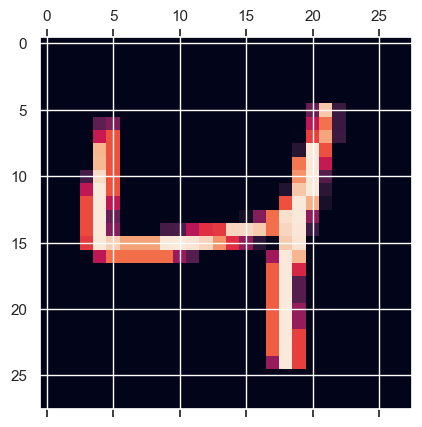

In [9]:
plt.matshow(X_train[2])

In [10]:
y_train[2]

4

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
X_train=X_train/255
X_test=X_test/255

In [13]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [14]:
X_train_flattened.shape

(60000, 784)

In [15]:
X_test_flattened.shape

(10000, 784)

In [16]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 601us/step - loss: 0.4690 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 1s 773us/step - loss: 0.3043 - accuracy: 0.9160
Epoch 3/5
1875/1875 [==============================] - 1s 716us/step - loss: 0.2835 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 1s 660us/step - loss: 0.2729 - accuracy: 0.9245
Epoch 5/5
1875/1875 [==============================] - 1s 662us/step - loss: 0.2662 - accuracy: 0.9262


In [18]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 639us/step - loss: 0.2678 - accuracy: 0.9255


[0.2678147554397583, 0.9254999756813049]

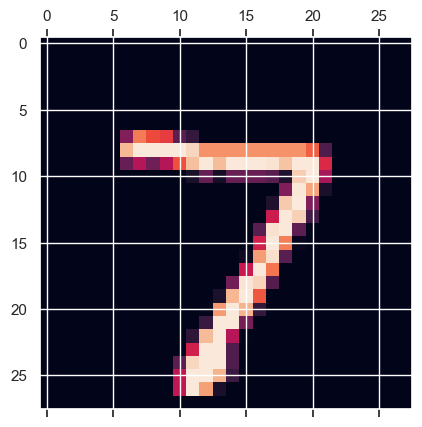

In [19]:
plt.matshow(X_test[0])

In [20]:
y_predicted=model.predict(X_test_flattened)

313/313 [==============================] - 0s 472us/step


In [21]:
y_predicted[0]

array([2.3354458e-02, 4.6786764e-07, 4.0572748e-02, 9.6084720e-01,
       2.6333155e-03, 1.1213304e-01, 1.2473845e-06, 9.9980539e-01,
       1.1413474e-01, 6.7757595e-01], dtype=float32)

In [22]:
np.argmax(y_predicted[0])

7

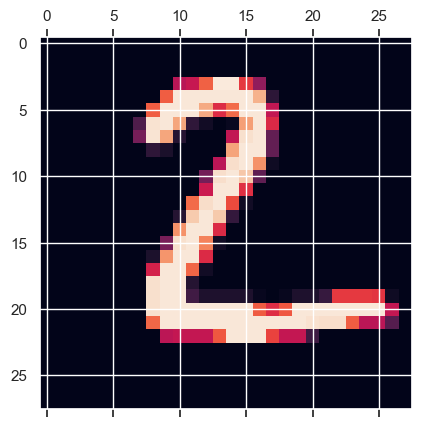

In [23]:
plt.matshow(X_test[1])

In [24]:
y_predicted[1]

array([4.4145095e-01, 8.3283754e-03, 9.9924648e-01, 4.4493163e-01,
       7.8958118e-10, 8.6350143e-01, 8.9454120e-01, 3.7413540e-13,
       2.3070867e-01, 2.2393891e-09], dtype=float32)

In [25]:
np.argmax(y_predicted[1])

2

In [26]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [27]:
y_predicted_labels[0:5]

[7, 2, 1, 0, 4]

In [28]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [29]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    2,    0,    6,    5,    2,    4,    1],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   6,   11,  909,   17,    9,    5,   12,    9,   51,    3],
       [   3,    0,   16,  923,    1,   23,    2,    8,   26,    8],
       [   1,    1,    3,    1,  920,    0,   10,    3,   11,   32],
       [   7,    3,    1,   37,    9,  771,   14,    4,   40,    6],
       [  10,    3,    6,    2,    8,   12,  910,    2,    5,    0],
       [   1,    8,   21,    9,    8,    1,    0,  937,    4,   39],
       [   5,    8,    5,   19,    9,   20,    8,    6,  889,    5],
       [   9,    7,    1,   11,   31,    6,    0,   13,   10,  921]])>

Text(47.25, 0.5, 'Truth')

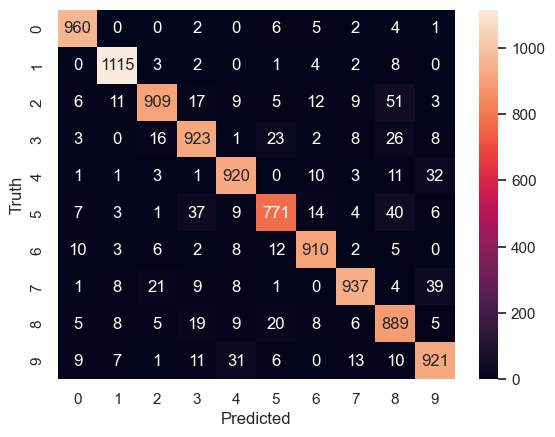

In [30]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [31]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2756 - accuracy: 0.9209
Epoch 2/5
1875/1875 [==============================] - 2s 956us/step - loss: 0.1250 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 2s 914us/step - loss: 0.0881 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 2s 914us/step - loss: 0.0675 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 2s 923us/step - loss: 0.0523 - accuracy: 0.9839


In [32]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 669us/step - loss: 0.0850 - accuracy: 0.9723


[0.0850198045372963, 0.9722999930381775]

313/313 [==============================] - 0s 571us/step


Text(47.25, 0.5, 'Truth')

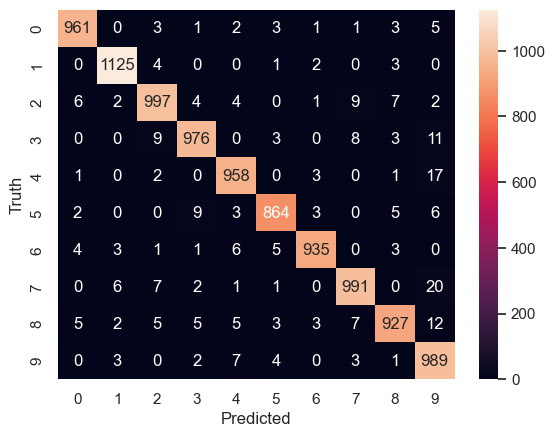

In [33]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [34]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2773 - accuracy: 0.9197
Epoch 2/10
1875/1875 [==============================] - 2s 977us/step - loss: 0.1294 - accuracy: 0.9625
Epoch 3/10
1875/1875 [==============================] - 2s 975us/step - loss: 0.0907 - accuracy: 0.9723
Epoch 4/10
1875/1875 [==============================] - 2s 968us/step - loss: 0.0691 - accuracy: 0.9787
Epoch 5/10
1875/1875 [==============================] - 2s 957us/step - loss: 0.0549 - accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 2s 926us/step - loss: 0.0442 - accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 2s 913us/step - loss: 0.0364 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 2s 913us/step - loss: 0.0298 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 2s 922us/step - loss: 0.0253 - accuracy: 0.9921
Epoch 10/10
1875/1875 [==============================] - 2s 922us/

In [35]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 666us/step - loss: 0.0814 - accuracy: 0.9768


[0.08136375993490219, 0.9768000245094299]

313/313 [==============================] - 0s 590us/step


Text(47.25, 0.5, 'Truth')

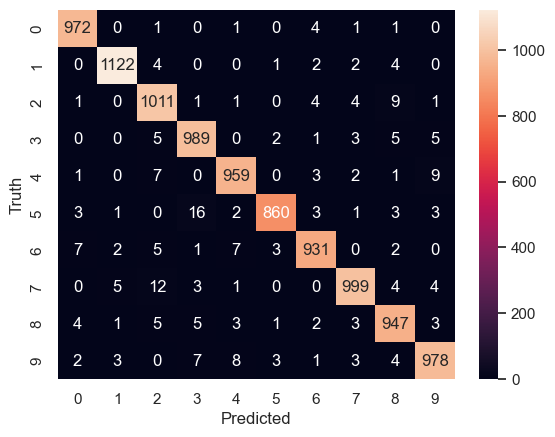

In [37]:
y_predicted=model.predict(X_test)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")